Training Step: 2149  | total loss: 0.01163 | time: 6.671s
| Adam | epoch: 010 | loss: 0.01163 -- iter: 54784/55000
Training Step: 2150  | total loss: 0.01145 | time: 7.717s
| Adam | epoch: 010 | loss: 0.01145 | val_loss: 0.00961 -- iter: 55000/55000
--

Test encoding of X[0]:
[[-0.28710100054740906, 1.3610178232192993, -0.4183318316936493, 0.8632714748382568, 0.2864013910293579, -0.8169025182723999, 0.4701160788536072, 0.8284136652946472, 0.9799593091011047, -2.0488405227661133, 1.0423558950424194, -0.6641801595687866, -0.30874109268188477, 0.6500678062438965, -1.0055276155471802, 0.36308562755584717, 0.7192901372909546, 1.07757568359375, -0.028949303552508354, 0.7178395986557007, -0.939063310623169, -0.37534505128860474, -0.19406844675540924, 0.4469009339809418, 0.5708785057067871, 0.2538951635360718, -1.0375412702560425, 0.2498866468667984, -2.1560378074645996, -0.4197421967983246, -1.2453842163085938, -0.33379989862442017, -0.8606520891189575, -0.11463066190481186, 1.313977956771850

/Users/Blackbak/Applications/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


NotImplementedError: 

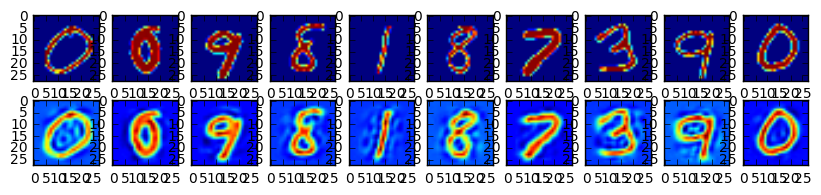

In [12]:
from __future__ import division, print_function, absolute_import

import numpy as np
import matplotlib.pyplot as plt
import tflearn
%matplotlib inline

# Data loading and preprocessing
import tflearn.datasets.mnist as mnist
X, Y, testX, testY = mnist.load_data(one_hot=True)

# Building the encoder
encoder = tflearn.input_data(shape=[None, 784])
encoder = tflearn.fully_connected(encoder, 256)
encoder = tflearn.fully_connected(encoder, 64)

# Building the decoder
decoder = tflearn.fully_connected(encoder, 256)
decoder = tflearn.fully_connected(decoder, 784)

# Regression, with mean square error
net = tflearn.regression(decoder, optimizer='adam', learning_rate=0.001,
                         loss='mean_square', metric=None)

# Training the auto encoder
model = tflearn.DNN(net, tensorboard_verbose=0)
model.fit(X, X, n_epoch=10, validation_set=(testX, testX),
          run_id="auto_encoder", batch_size=256)

# Encoding X[0] for test
print("\nTest encoding of X[0]:")
# New model, re-using the same session, for weights sharing
encoding_model = tflearn.DNN(encoder, session=model.session)
print(encoding_model.predict([X[0]]))

# Testing the image reconstruction on new data (test set)
print("\nVisualizing results after being encoded and decoded:")
testX = tflearn.data_utils.shuffle(testX)[0]
# Applying encode and decode over test set
encode_decode = model.predict(testX)
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(10):
    a[0][i].imshow(np.reshape(testX[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
f.show()
plt.draw()
plt.waitforbuttonpress()

In [11]:
X[0]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    